In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel(r'D:\Jupyter notebook\Data sets\CCRB-Complaint-Data_202007271729\Cleaned_NYPD_dataset.xlsx')
df.info()
df.head(5)  #checking the dataset to verify if I've got the right data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25384 entries, 0 to 25383
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   command_now               25384 non-null  object 
 1   month_received            25384 non-null  int64  
 2   year_received             25384 non-null  int64  
 3   month_closed              25384 non-null  int64  
 4   year_closed               25384 non-null  int64  
 5   command_at_incident       25384 non-null  object 
 6   rank_now                  25384 non-null  object 
 7   rank_incident             25384 non-null  object 
 8   mos_ethnicity             25384 non-null  object 
 9   mos_gender                25384 non-null  object 
 10  mos_age_incident          25384 non-null  int64  
 11  complainant_ethnicity     25384 non-null  object 
 12  complainant_gender        25384 non-null  object 
 13  complainant_age_incident  25384 non-null  float64
 14  fado_t

,command_now,month_received,year_received,month_closed,year_closed,command_at_incident,rank_now,rank_incident,mos_ethnicity,mos_gender,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,Name
0,078 Precinct,7,2019,5,2020,078 Precinct,Police Officer,Police Officer,Hispanic,Male,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Jonathan Ruiz
1,078 Precinct,11,2011,8,2012,Patrol Borough Brooklyn South,Police Officer,Police Officer,White,Male,...,Black,Male,26.0,Discourtesy,Action,67,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
2,078 Precinct,11,2011,8,2012,Patrol Borough Brooklyn South,Police Officer,Police Officer,White,Male,...,Black,Male,26.0,Offensive Language,Race,67,Moving violation,Moving violation summons issued,Substantiated (Charges),John Sears
3,078 Precinct,7,2012,9,2013,Patrol Borough Brooklyn South,Police Officer,Police Officer,White,Male,...,Black,Male,45.0,Abuse of Authority,Question,67,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),John Sears
4,078 Precinct,5,2017,10,2017,078 Precinct,Sergeant,Sergeant,Black,Female,...,White,Male,31.0,Abuse of Authority,Refusal to process civilian complaint,78,C/V telephoned PCT,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Paula Smith


### We'll explore the impact of the police and how it affects the likelihood of an offence happening. 
We'll look at categories such as  age, Rank,gender and Precinct

array([30, 20, 50, 40, 60], dtype=int64)

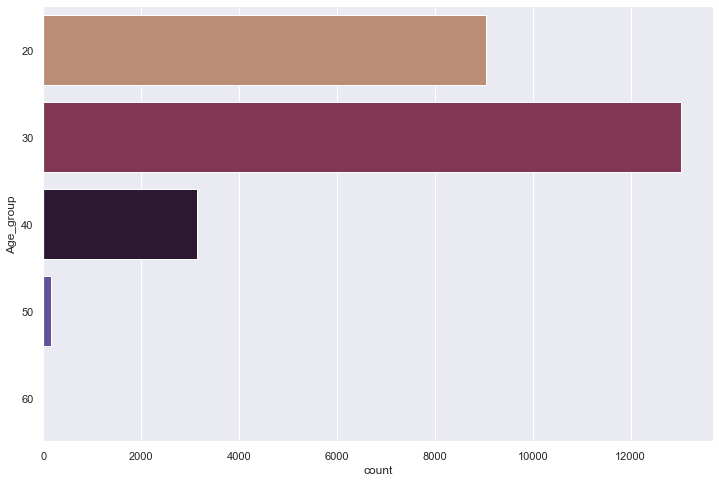

In [3]:
#We'll create a new officer age column where age is categorised in below 20s,20s,30s,40s and so forth
df['Age_group'] =  round((df.mos_age_incident//10)*10 , 0)
fig=plt.figure(figsize=(12, 8))
sns.countplot(data = df ,y='Age_group',palette="twilight_r",orient='h')
df.Age_group.unique()

In [4]:
#We can see that NYPD officers in their 30s are more likely to have with complaints than any other age group 
#let's compare the officer age group that was more likely to be exonerated
#First we'll create a column describing if the officer's force was deemed Substantiated,Unsubstantiated or exonerated by the  CCRB

def ccrb_check(x):
    if 'unsubstantiated' in x.lower().split():
        return 'unsubstantiated'
    elif 'substantiated' in x.lower().split():
        return 'substantiated'
    elif 'exonerated' in x.lower().split():
        return 'exonerated'
    
df['CCRB_CHECK'] = df.board_disposition.apply(lambda x: ccrb_check(x) )

Twenty_not_exonerated = df[(df.CCRB_CHECK == 'substantiated') & (df.Age_group == 20)]['Name'].count()/df[df.Age_group == 20]['Name'].count()
Thirty_not_exonerated = df[(df.CCRB_CHECK == 'substantiated') & (df.Age_group == 30)]['Name'].count()/df[df.Age_group == 30]['Name'].count()
Forty_not_exonerated = df[(df.CCRB_CHECK == 'substantiated') & (df.Age_group == 40)]['Name'].count()/df[df.Age_group == 40]['Name'].count()
fifty_not_exonerated = df[(df.CCRB_CHECK == 'substantiated') & (df.Age_group == 50)]['Name'].count()/df[df.Age_group == 50]['Name'].count()
sixty_not_exonerated = df[(df.CCRB_CHECK == 'substantiated') & (df.Age_group == 60)]['Name'].count()/df[df.Age_group == 60]['Name'].count()

twenty = '20s age group: ' + str(np.ceil(Twenty_not_exonerated*100))
thirties = '30s age group: ' + str(np.ceil(Thirty_not_exonerated*100))
forties = '40s age group: ' +str(np.ceil(Forty_not_exonerated*100))
fifties = '50s age group: ' +str(np.ceil(fifty_not_exonerated*100))
sixties = '60s age group: '+str(np.ceil(sixty_not_exonerated*100))
print(twenty,thirties,forties,fifties,sixties, sep='\n')

20s age group: 25.0
30s age group: 25.0
40s age group: 26.0
50s age group: 30.0
60s age group: 50.0


From the data above, we can see that officers in their 60s and 50s are more likely to be found guilty of miscounduct . In general,by the CCRB. In short, the older the officer, the less likely they are to get exonerated.
###### Next we're going to look at the precincts

In [5]:
df.precinct.value_counts(ascending=False).head(10) #top 10 highest precincts with complaints

75     1645
73      910
79      881
44      858
40      850
46      843
67      802
77      736
47      685
120     620
Name: precinct, dtype: int64

In [6]:
#We'll explore the percentage of NYPD  officers that are exonerated or not per precinct for the top 1o highest precincts
pt= pd.pivot_table(df,values='fado_type',aggfunc='count',index='precinct',columns='CCRB_CHECK').sort_values(by='precinct',ascending=False)
pt['%exonerated'] = round(pt.exonerated/(pt.exonerated+pt.substantiated+pt.unsubstantiated) *100,1)
pt['%substantiated'] = round(pt.substantiated/(pt.exonerated+pt.substantiated+pt.unsubstantiated) *100,1)
pt['%unsubstantiated'] = round(pt.unsubstantiated/(pt.exonerated+pt.substantiated+pt.unsubstantiated) *100,1)
pt.drop(['exonerated','substantiated','unsubstantiated'],axis=1,inplace=True)
pt.sort_values(by='%exonerated',ascending=False,inplace=True)
pt['Index'] = np.arange(1,79)
pt.reset_index(inplace=True)
pt.set_index('Index',inplace=True)
print(pt,pt.sort_values(by='%substantiated',ascending=False),sep='\n \n \n \n')

CCRB_CHECK  precinct  %exonerated  %substantiated  %unsubstantiated
Index                                                              
1                100         37.8            19.4              42.9
2                 10         37.3            24.3              38.4
3                 24         36.9            25.7              37.4
4                107         35.7            31.0              33.3
5                 90         35.1            21.8              43.2
...              ...          ...             ...               ...
74                72         19.9            26.7              53.4
75               108         18.4            34.0              47.6
76                 5         16.2            40.0              43.8
77               111         15.4            46.2              38.5
78              1000          NaN             NaN               NaN

[78 rows x 4 columns]
 
 
 
CCRB_CHECK  precinct  %exonerated  %substantiated  %unsubstantiated
Index              

#### Precinct 75 has the most number of complaints which are almost 2times the amount of the precinct with the second highest complaints
Officers from precinct 100 had the highest exoneration rate 
Officers from precicnt 77 had were most likely to be found in misconduct by the CCRB

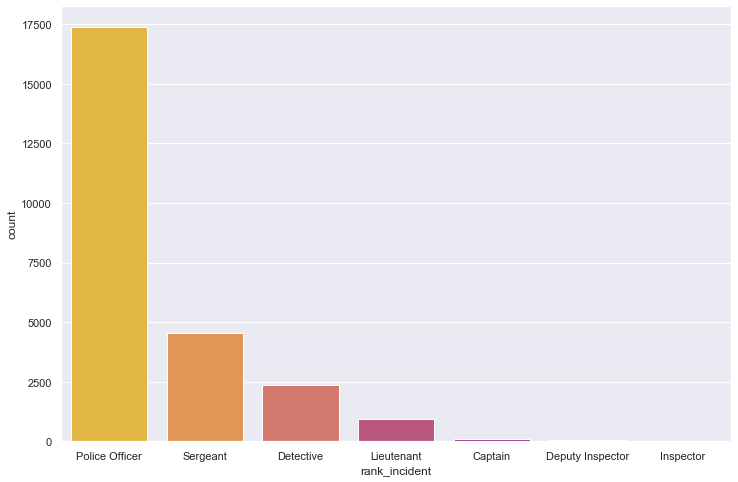

In [7]:
#### The rank of the officers and the complaints will be explored
fig=plt.figure(figsize=(12, 8))
sns.countplot(x='rank_incident',data=df,palette='plasma_r')

The number of complaints goes down with an increase in rank. This could be attributed to more experience and less contact with criminals and civilians

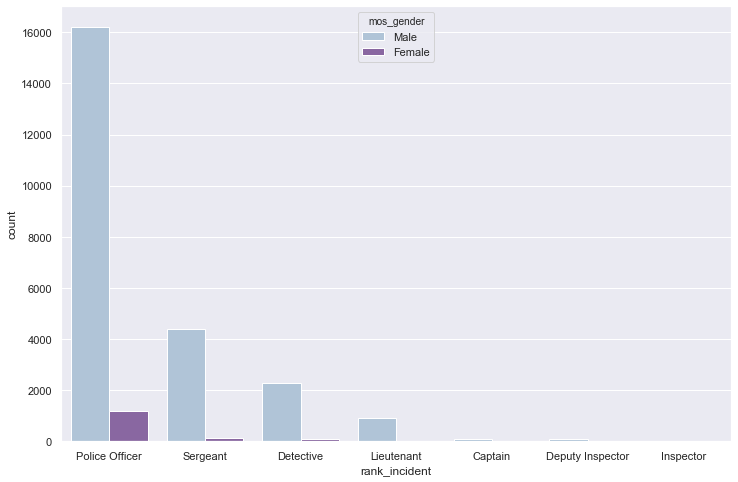

In [8]:
#Let's take a look at how rank varies with sex in the NYPD and how an officer's sex affects the way they misconduct themselves
fig=plt.figure(figsize=(12, 8))
sns.countplot(x='rank_incident',data=df,hue='mos_gender',palette='BuPu')

In [57]:
#There are less female officers with complaints compared to male officers
#Let's take a look a the ways both sexes misconduct themselves
#first we'll explore the complaint words in each fado_type to get a better understanding of what each fado_type
#We'll bring up the glossary and check Sheet4/Tab 3 for unique words per fado type
s4 =pd.read_excel(r'D:\Jupyter notebook\Data sets\CCRB-Complaint-Data_202007271729\CCRB Data Layout Table.xlsx',sheet_name=3)
Discourtesy = s4[s4['FADO Category'] == 'Discourtesy']['Allegation type'].unique()
Force= s4[s4['FADO Category'] == 'Force']['Allegation type'].unique()
Abuse_of_Athority =  s4[s4['FADO Category'] == 'Abuse of Authority']['Allegation type'].unique()
Offensive_language =  s4[s4['FADO Category'] == 'Offensive Language']['Allegation type'].unique()
print(Abuse_of_Athority)

['Stop' 'Search (of person)' 'Frisk' 'Premises entered and/or searched'
 'Refusal to provide name/shield number' 'Vehicle search'
 'Threat of arrest' 'Vehicle stop' 'Threat of force (verbal or physical)'
 'Question and/or stop' 'Strip-searched' 'Question' 'Other'
 'Property damaged' 'Retaliatory summons' 'Entry of Premises'
 'Refusal to obtain medical treatment' 'Frisk and/or search'
 'Refusal to process civilian complaint' 'Gun Drawn' 'Seizure of property'
 'Failure to provide RTKA card' 'Threat to damage/seize property'
 'Search of Premises' 'Retaliatory arrest'
 'Refusal to show search warrant' 'Forcible Removal to Hospital'
 'Threat of summons' 'Interference with recording' 'Threat to notify ACS'
 'Refusal to provide shield number' 'Refusal to provide name'
 'Person Searched' 'Threat of force' 'Other - Abuse' 'Threat of Arrest'
 'Premise Searched' 'Property Damaged' 'Search of recording device'
 'Vehicle Searched' 'Threat re: removal to hospital' 'Detention'
 'Photography/Videograp

In [61]:
#The unique words above give us an insight into the examples of anofficer abusing his authority
print(Discourtesy)

['Word' 'Action' 'Curse' 'Nasty Words' 'Gesture' 'Demeanor/tone'
 'Other- Discourtesy' 'Other' 'Rude Gesture' 'Profane Gesture'
 'Gay/Lesbian Slur' 'Sexist Remark']


In [59]:
#We can see that some words in the Discourtesy fado type are actually better suited for the offensive language fado type
#Words such as 'Gay/Lesbian Slur' 'Sexist Remark','Curse' 'Nasty Words'
#It safe to say that the Discourtesy and Offensive language fado types intersect alot
print(Force)

['Physical force' 'Gun Pointed' 'Pepper spray'
 'Nightstick as club (incl asp & baton)' 'Chokehold' 'Push/Shove'
 'Hit against inanimate object' 'Other - Force' 'Other' 'Punch/Kick'
 'Nonlethal restraining device' 'Handcuffs too tight' 'Dragged/Pulled'
 'Beat' 'Other blunt instrument as a club' 'Gun fired' 'Vehicle'
 'Gun as club' 'Nightstick/Billy/Club' 'Radio as club'
 'Restricted Breathing' 'Mace' 'Flashlight as club' 'Slap' 'Radio As Club'
 'Gun As Club' 'Police shield' 'Flashlight As Club' 'Animal' 'Gun Fired']


In [60]:
print(Offensive_language)

['Black' 'Ethnicity' 'Gender' 'Gender Identity' 'Hispanic' 'Jewish'
 'Oriental' 'Other' 'Other - Ethnic Slur' 'Other Asian'
 'Physical disability' 'Race' 'Religion' 'Sexual orientation' 'White']


##### After getting a better understanding of each fado type, we can now move onto analysing the fado type common for each sex

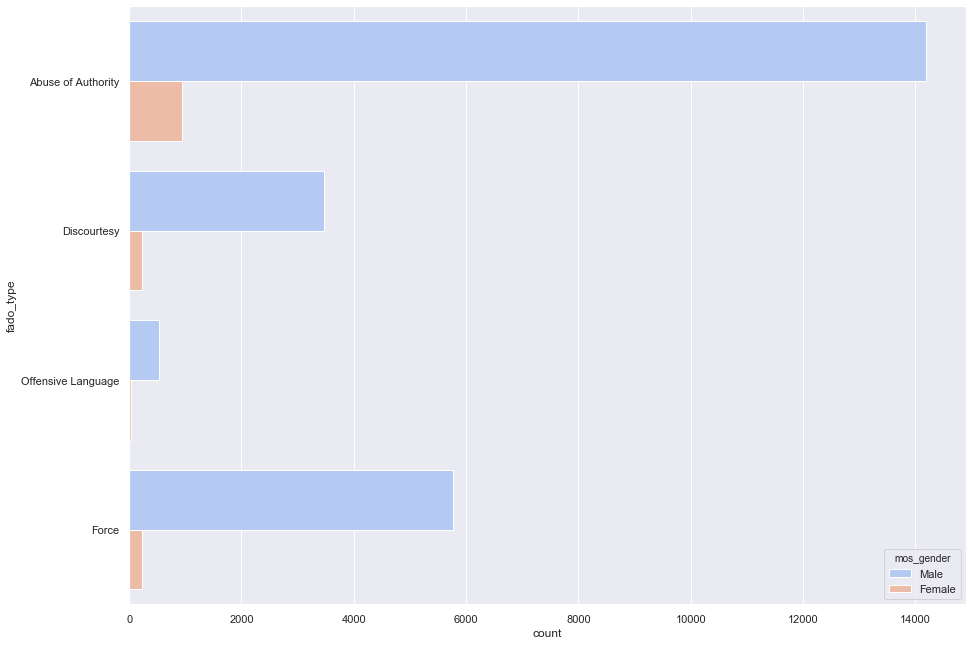

In [62]:
plt.figure(figsize=(15,11))
sns.countplot(data=df,y='fado_type',hue='mos_gender',palette='coolwarm')

###### The graph above shows that Abuse of authority is a common misconduct amongst both sexes. Let's make a table of the percentage representation of both genders per fado_type

In [10]:
F_abuse_of_authority = df[(df.fado_type == 'Abuse of Authority') & (df.mos_gender == 'Female')].Name.count() /df[df.fado_type == 'Abuse of Authority'].Name.count()
F_Discourtesy = df[(df.fado_type == 'Discourtesy') & (df.mos_gender == 'Female')].Name.count()/df[df.fado_type == 'Discourtesy'].Name.count()
F_Offensive_Language = df[(df.fado_type == 'Offensive Language') & (df.mos_gender == 'Female')].Name.count() / df[df.fado_type == 'Offensive Language'].Name.count()
F_Force = df[(df.fado_type == 'Force') & (df.mos_gender == 'Female')].Name.count()/df[df.fado_type == 'Force'].Name.count()
Female_Officer =[round(F_abuse_of_authority*100,1),round(F_Discourtesy*100,1),round(F_Offensive_Language*100,1),round(F_Force*100,1)]

M_abuse_of_authority = df[(df.fado_type == 'Abuse of Authority') & (df.mos_gender == 'Male')].Name.count()/df[df.fado_type == 'Abuse of Authority'].Name.count()
M_Discourtesy = df[(df.fado_type == 'Discourtesy') & (df.mos_gender == 'Male')].Name.count()/df[df.fado_type == 'Discourtesy'].Name.count()
M_Offensive_Language = df[(df.fado_type == 'Offensive Language') & (df.mos_gender == 'Male')].Name.count()/df[df.fado_type == 'Offensive Language'].Name.count()
M_Force = df[(df.fado_type == 'Force') & (df.mos_gender == 'Male')].Name.count()/df[df.fado_type == 'Force'].Name.count()
Male_Officer = [round(M_abuse_of_authority*100,1),round(M_Discourtesy*100,1),round(M_Offensive_Language*100,1),round(M_Force*100,1)]

gend_dict = {'Female Officer':Female_Officer,'Male':Male_Officer}
gend_table = pd.DataFrame(gend_dict,index=['Abuse of Authority', 'Discourtesy', 'Offensive Language', 'Force'])
gend_table.head(5)

,Female Officer,Male
Abuse of Authority,6.2,93.8
Discourtesy,6.0,94.0
Offensive Language,5.6,94.4
Force,3.8,96.2


##### As shown from the table  above, female officers are less represented in misconduct complaints that involved force and Offensive language compared to their male counterparts.
##### Female officers are more likely to abuse their authority when misconducting themselves whilst their male counterparts are more likely to use force 
##### Male NYPD officers are more aggressive than their female counterparts

We will now look at how the gender breakdown of the complainants

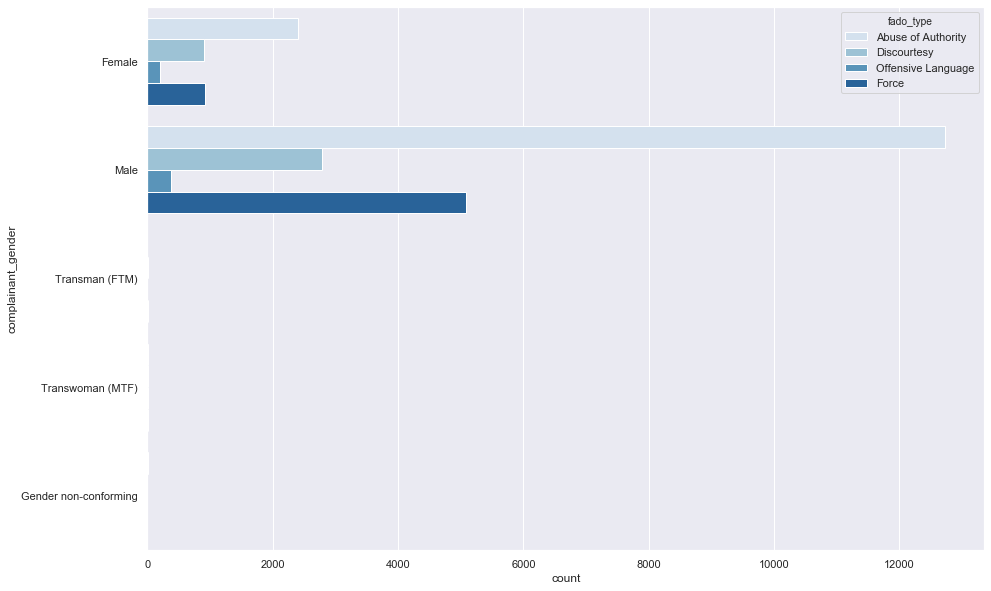

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(hue='fado_type',y='complainant_gender',data=df,palette='Blues')

In [12]:
#The graph shows that male New York citizens are more likely to receive harsh treatment by the NYPD. 
#Let's take a look if there any sexist and anti-trans complaints
#We'll first look for any unique words in the allegations columns that denote sexit or anti-LGBTQ misconduct
df.allegation.unique()

array(['Failure to provide RTKA card', 'Action', 'Race', 'Question',
       'Refusal to process civilian complaint', 'Sexual orientation',
       'Word', 'Refusal to provide shield number', 'Retaliatory summons',
       'Search (of person)', 'Pepper spray', 'Physical force',
       'Handcuffs too tight', 'Frisk', 'Vehicle stop', 'Vehicle search',
       'Refusal to provide name/shield number', 'Strip-searched',
       'Threat of arrest', 'Threat of force (verbal or physical)', 'Stop',
       'Refusal to obtain medical treatment',
       'Hit against inanimate object', 'Frisk and/or search', 'Other',
       'Question and/or stop', 'Nonlethal restraining device',
       'Retaliatory arrest', 'Chokehold', 'Gender',
       'Nightstick as club (incl asp & baton)', 'Refusal to provide name',
       'Seizure of property', 'Gun Pointed',
       'Other blunt instrument as a club',
       'Refusal to show search warrant',
       'Threat to damage/seize property', 'Gesture',
       'Sex Miscon (S

In [13]:
#We'll create a list with words in the allegations column that denote sexist misconduct
Sexist_misconduct = ['Gender', 'Sex Miscon (Sexual Harassment, Verbal)','Sex Miscon (Sexual Harassment, Gesture)','Sexual Misconduct (Sexual Humiliation)','Sexual orientation','Sex Miscon (Sexual/Romantic Proposition)','Gender Identity']
#We classified gender identity as a sexist misconduct because its based on one's gender
Percent_sexist = round(df[df.allegation.isin(Sexist_misconduct)].Name.count()/df.Name.count() *100,2)
print('Percentage of misconducts that are sexist: ' + str(Percent_sexist)+'%')

Percentage of misconducts that are sexist: 0.8%


In [14]:
guilty_sexist =  df[(df.allegation.isin(Sexist_misconduct)) & (df['CCRB_CHECK'].isin(['substantiated','unsubstantiated']))].Name.count()/df[df.allegation.isin(Sexist_misconduct)].Name.count()
guilty_sexist = round(guilty_sexist*100,2)
print(str(guilty_sexist)+ '% of sexist complaints were found to have been misconducts by the CCRB.')

100.0% of sexist complaints were found to have been misconducts by the CCRB.


##### According to the data,all the sexist complaints were successful and for every 1000 complaints,8 are sexist 


In [15]:
#We'll now look at any race related misconducts
#We'll create a list with words in the allegations column that denote race-related misconduct
race_related = ['Race','Ethnicity']
Percent_race = round(df[df.allegation.isin(race_related)].Name.count()/df.Name.count() *100,2)
Percent_race = 'Percentage of misconducts that are race related : ' + str(Percent_race)+'%'

guilty_race =  df[(df.allegation.isin(race_related)) & (df['CCRB_CHECK'].isin(['substantiated','unsubstantiated']))].Name.count()/df[df.allegation.isin(race_related)].Name.count()
guilty_race = round(guilty_sexist*100,2)
Percent_race_guilty = str(guilty_sexist)+ '% of race related complaints were found to have been misconducts by the CCRB.'
print(Percent_race,Percent_race_guilty,sep='\n')


Percentage of misconducts that are race related : 1.29%
100.0% of race related complaints were found to have been misconducts by the CCRB.


#### All race related complaints were deemed misconducts by the CCRB.
#### Atleast 1 in every 100 complaint cases is race related

In [69]:
#Let's take a look at the racial break down of complaints
rp =df.pivot_table(columns='fado_type',values='Name',aggfunc='count',index='complainant_ethnicity')
Total_fado_type=(rp['Abuse of Authority']+rp['Discourtesy']+ rp['Force']+rp['Offensive Language'])
rp['Abuse of Authority%'] = round( rp['Abuse of Authority']/Total_fado_type *100,2)
rp['Force%'] = round(rp['Force']/Total_fado_type *100,2)
rp['Offensive Language and Discourtesy%'] = round((rp['Offensive Language']+rp['Discourtesy'])/Total_fado_type *100,2)
rp.drop(['Offensive Language','Force','Discourtesy','Abuse of Authority'],axis=1,inplace=True)
rp.reset_index(inplace=True)
rp

fado_type,complainant_ethnicity,Abuse of Authority%,Force%,Offensive Language and Discourtesy%
0,American Indian,73.33,11.67,15.00
1,Asian,62.18,18.52,19.30
2,Black,60.39,23.85,15.75
3,Hispanic,57.06,25.16,17.79
4,White,59.81,20.02,20.17


#### For each racial group, most complaints were about Abuse of athority
#### For American Indian,Asian and Black New Yorkers, morethan 1 in 3 complaints made about police misconduct are about Abuse of Authority
#### Hispanic and Black New Yorkers are more likely to make a complaint about bring handled aggressively by the NYPD than any other racial group
#### White New Yorkers are more likely to make a complaint about offensive language and discourtesy than any other racial group 

In [79]:
df.complainant_ethnicity.value_counts()

Black              16068
Hispanic            6066
White               2677
Asian                513
American Indian       60
Name: complainant_ethnicity, dtype: int64

In [78]:
#Lastly we'll look at the commonest complainst per race
pr = df.pivot_table(values='Name',columns='complainant_ethnicity',index='fado_type',aggfunc='count')

Total_ethinc=(pr['American Indian']+pr['Asian']+ pr['Black']+pr['Hispanic'] + pr['White'])
pr['American Indian%']= round( pr['American Indian']/Total_ethinc *100,2)
pr['Asian%'] = round( pr['Asian']/Total_ethinc *100,2)
pr['Black%'] = round( pr['Black']/Total_ethinc *100,2)
pr['Hispanic%'] = round( pr['Hispanic']/Total_ethinc *100,2)
pr['White%'] =  round( pr['White']/Total_ethinc *100,2)
pr.drop(['American Indian','Black','White','Hispanic','Asian'],axis=1,inplace=True)
pr

complainant_ethnicity,American Indian%,Asian%,Black%,Hispanic%,White%
fado_type,,,,,
Abuse of Authority,0.29,2.11,64.14,22.88,10.58
Discourtesy,0.22,2.19,58.44,26.28,12.87
Force,0.12,1.58,63.92,25.45,8.94
Offensive Language,0.18,3.17,65.96,19.22,11.46


#### The data tells us that black New Yorkers are more likely to receive harsh treatment from the NYPD followed by Hispanic New Yorkers
####  Asian and American Indian New Yorkers are less likely to receive harsh treatment than any other racial group
